<a href="https://colab.research.google.com/github/Xphi310302/AI-projects/blob/main/AI_Homework_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax regression for Cifar 10

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 

In [ ]:
# Download data
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

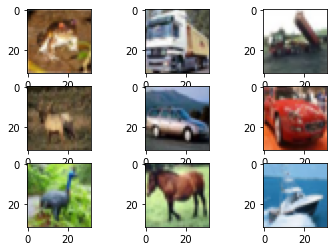

In [ ]:
# Visualize train data
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
# Preprocess label
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Preprocess image
def preprocess(image):
  image = image.reshape((image.shape[0], image.shape[1], image.shape[2], 3))
  image = image.astype('float32')/255.0
  return image
X_train = preprocess(X_train)
X_test = preprocess(X_test)
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Define Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
img_rows = img_cols = 32
channels = 3
model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols, channels)))
model.add(Dense(1e5, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 100000)            307300000 
                                                                 
 dense_3 (Dense)             (None, 1000)              100001000 
                                                                 
 dense_4 (Dense)             (None, 100)               100100    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 407,402,110
Trainable params: 407,402,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 77s 95ms/step - loss: 2.2323 - accuracy: 0.3153 - val_loss: 1.7410 - val_accuracy: 0.3663
Epoch 2/20
782/782 [==============================] - 75s 96ms/step - loss: 1.6725 - accuracy: 0.4005 - val_loss: 1.6224 - val_accuracy: 0.4147
Epoch 3/20
782/782 [==============================] - 75s 96ms/step - loss: 1.5761 - accuracy: 0.4369 - val_loss: 1.5737 - val_accuracy: 0.4315
Epoch 4/20
782/782 [==============================] - 78s 99ms/step - loss: 1.5128 - accuracy: 0.4597 - val_loss: 1.4937 - val_accuracy: 0.4708
Epoch 5/20
782/782 [==============================] - 76s 97ms/step - loss: 1.4705 - accuracy: 0.4753 - val_loss: 1.5234 - val_accuracy: 0.4575
Epoch 6/20
782/782 [==============================] - 78s 100ms/step - loss: 1.4307 - accuracy: 0.4912 - val_loss: 1.4644 - val_accuracy: 0.4846
Epoch 7/20
782/782 [==============================] - 78s 100ms/step - loss: 1.3919 - accuracy: 0.5033 - val_loss: 1.4439 - val_accurac

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/neural_weight.h5')

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
plot_history(history, 'Simple NN with 64 batch size')

## Define Convolutional Neural Network

In [ ]:
import tensorflow as tf
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 6s 8ms/step - loss: 1.5563 - accuracy: 0.4310 - val_loss: 1.1906 - val_accuracy: 0.5736
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 1.1620 - accuracy: 0.5840 - val_loss: 1.0025 - val_accuracy: 0.6403
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.9876 - accuracy: 0.6517 - val_loss: 0.8982 - val_accuracy: 0.6882
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.8749 - accuracy: 0.6909 - val_loss: 0.7719 - val_accuracy: 0.7327
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.8023 - accuracy: 0.7183 - val_loss: 0.7412 - val_accuracy: 0.7403
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7564 - accuracy: 0.7347 - val_loss: 0.7201 - val_accuracy: 0.7465
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 0.7065 - accuracy: 0.7518 - val_loss: 0.6896 - val_accuracy: 0.7653
Epoch 

In [ ]:
cnn_model.save('/content/drive/MyDrive/Colab Notebooks/cifar10_weights.h5')

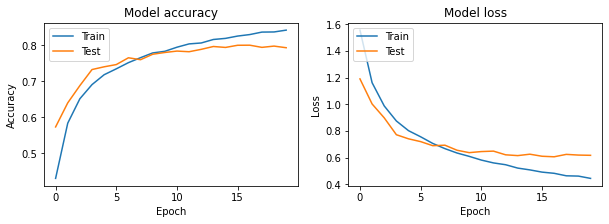

In [ ]:
plot_history(cnn_history, 'CNN with 64 batch size')

## Evaluate model

In [ ]:
# Confusion matrix
# Predict the values from the validation dataset
y_pred = cnn_model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 2ms/step


[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

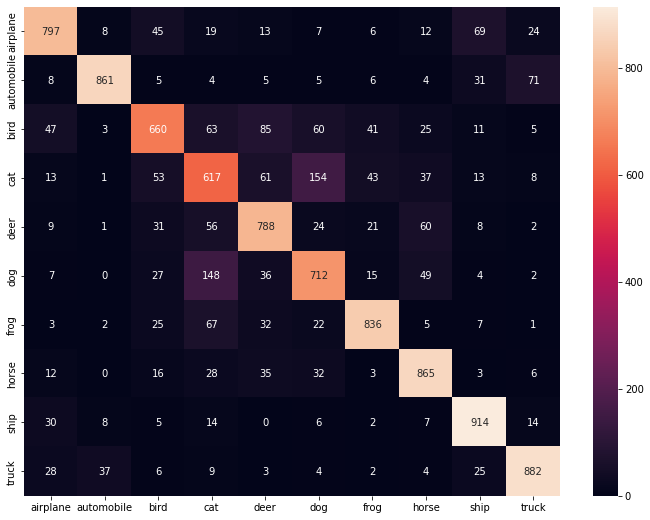

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=labels, yticklabels=labels)

# CIFAR 100


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
from keras.datasets import cifar100

In [ ]:
(X_train, y_train),(X_test, y_test) = cifar100.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
classes = np.unique(y_train)
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

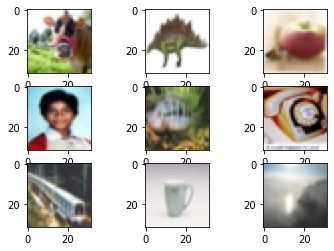

In [ ]:
# Visualize train data
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
# Preprocess label
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(50000, 100)
(10000, 100)


In [ ]:
# Preprocess image
def preprocess(image):
  image = image.reshape((image.shape[0], image.shape[1], image.shape[2], 3))
  image = image.astype('float32')/255.0
  return image
X_train = preprocess(X_train)
X_test = preprocess(X_test)
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Define CNN network


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=100, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 20, validation_data=(X_test,y_test))

Epoch 1/20
3125/3125 [==============================] - 15s 5ms/step - loss: 3.4878 - accuracy: 0.1818 - val_loss: 3.0922 - val_accuracy: 0.2476
Epoch 2/20
3125/3125 [==============================] - 13s 4ms/step - loss: 2.7173 - accuracy: 0.3161 - val_loss: 2.9980 - val_accuracy: 0.2753
Epoch 3/20
3125/3125 [==============================] - 15s 5ms/step - loss: 2.2957 - accuracy: 0.4018 - val_loss: 3.2680 - val_accuracy: 0.2695
Epoch 4/20
3125/3125 [==============================] - 12s 4ms/step - loss: 1.9190 - accuracy: 0.4841 - val_loss: 2.6695 - val_accuracy: 0.3449
Epoch 5/20
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5453 - accuracy: 0.5695 - val_loss: 2.6471 - val_accuracy: 0.3687
Epoch 6/20
3125/3125 [==============================] - 14s 4ms/step - loss: 1.1954 - accuracy: 0.6549 - val_loss: 3.0719 - val_accuracy: 0.3521
Epoch 7/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.9134 - accuracy: 0.7277 - val_loss: 3.3525 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/cifar100_weight.h5')

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history, title = ''):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

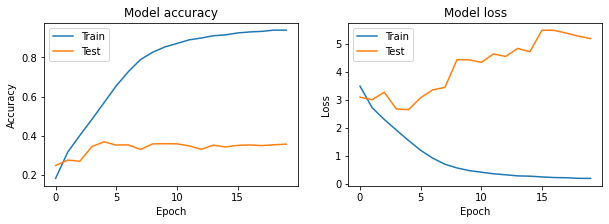

In [ ]:
plot_history(history)

## Evaluate model

In [ ]:
# Confusion matrix
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 2ms/step


[[Text(0, 0.5, '0'),
  Text(0, 3.5, '1'),
  Text(0, 6.5, '2'),
  Text(0, 9.5, '3'),
  Text(0, 12.5, '4'),
  Text(0, 15.5, '5'),
  Text(0, 18.5, '6'),
  Text(0, 21.5, '7'),
  Text(0, 24.5, '8'),
  Text(0, 27.5, '9'),
  Text(0, 30.5, '10'),
  Text(0, 33.5, '11'),
  Text(0, 36.5, '12'),
  Text(0, 39.5, '13'),
  Text(0, 42.5, '14'),
  Text(0, 45.5, '15'),
  Text(0, 48.5, '16'),
  Text(0, 51.5, '17'),
  Text(0, 54.5, '18'),
  Text(0, 57.5, '19'),
  Text(0, 60.5, '20'),
  Text(0, 63.5, '21'),
  Text(0, 66.5, '22'),
  Text(0, 69.5, '23'),
  Text(0, 72.5, '24'),
  Text(0, 75.5, '25'),
  Text(0, 78.5, '26'),
  Text(0, 81.5, '27'),
  Text(0, 84.5, '28'),
  Text(0, 87.5, '29'),
  Text(0, 90.5, '30'),
  Text(0, 93.5, '31'),
  Text(0, 96.5, '32'),
  Text(0, 99.5, '33')],
 [Text(0.5, 0, '0'),
  Text(2.5, 0, '1'),
  Text(4.5, 0, '2'),
  Text(6.5, 0, '3'),
  Text(8.5, 0, '4'),
  Text(10.5, 0, '5'),
  Text(12.5, 0, '6'),
  Text(14.5, 0, '7'),
  Text(16.5, 0, '8'),
  Text(18.5, 0, '9'),
  Text(20.5, 0, 

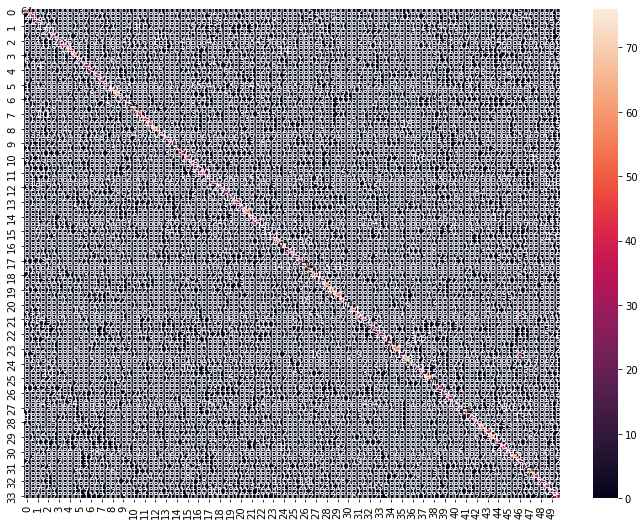

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

# Food-11 Datasets
This dataset is a small subset of food-101 dataset.
The main folder food11 contains two sub-folders :

train

test

Both train and test folders have 11 folders named
+ applepie cheesecake chickencurry
+ frenchfries friedrice
+ hamburger
+ hotdog icecream
+ omelette
+ pizza
+ sushi

Each folders inside train-set(total=9900) contain 900 images, and folders inside test-set(total=1100) contain 100 images.

https://www.kaggle.com/code/jiaowoguanren/food-11-image-classification-dataset-tensorflow/notebook

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Colab Notebooks/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# download dataset
! kaggle datasets download -d imbikramsaha/food11

 99% 515M/519M [00:07<00:00, 79.0MB/s]
100% 519M/519M [00:07<00:00, 74.2MB/s]


In [ ]:
! unzip food11.zip

Streaming output truncated to the last 5000 lines.
  inflating: food11/train/hamburger/2722745.jpg  
  inflating: food11/train/hamburger/272642.jpg  
  inflating: food11/train/hamburger/2726558.jpg  
  inflating: food11/train/hamburger/2738245.jpg  
  inflating: food11/train/hamburger/2745577.jpg  
  inflating: food11/train/hamburger/2745917.jpg  
  inflating: food11/train/hamburger/2754513.jpg  
  inflating: food11/train/hamburger/2756964.jpg  
  inflating: food11/train/hamburger/2762170.jpg  
  inflating: food11/train/hamburger/2766731.jpg  
  inflating: food11/train/hamburger/2771605.jpg  
  inflating: food11/train/hamburger/277584.jpg  
  inflating: food11/train/hamburger/2777938.jpg  
  inflating: food11/train/hamburger/2790429.jpg  
  inflating: food11/train/hamburger/279510.jpg  
  inflating: food11/train/hamburger/2797268.jpg  
  inflating: food11/train/hamburger/279729.jpg  
  inflating: food11/train/hamburger/2808308.jpg  
  inflating: food11/train/hamburger/281725.jpg  
  in

In [ ]:
import os
os.chdir('food11')
os.listdir()

['test', 'train']

In [ ]:
!pip install split-folders
import tensorflow as tf
import cv2, pathlib, splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
epochs = 15
batch_size = 64
img_height, img_width = 300, 300
input_shape = (img_height, img_width, 3)


def create_data_sparse():
    data_gen = ImageDataGenerator(rescale=1.0 / 255)
    train_ds = data_gen.flow_from_directory('train', target_size=(img_height, img_width),
                                            class_mode='sparse', batch_size=batch_size, subset='training') # sparse: the label is integer label, if categorical wille be one-hot label
    val_ds = data_gen.flow_from_directory('test', target_size=(img_height, img_width),
                                          class_mode='sparse', batch_size=batch_size, shuffle=False)
    return train_ds, val_ds
train_ds, val_ds = create_data_sparse()

Found 9900 images belonging to 11 classes.
Found 1100 images belonging to 11 classes.


In [ ]:
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Dropout, Conv2D, Activation
class Block(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides, padding, pool_size, dropout_rate):
        super(Block, self).__init__()
        self.C1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)
        self.B1 = BatchNormalization()
        self.A1 = Activation('relu')
        self.P1 = MaxPooling2D(pool_size=pool_size, strides=2, padding=padding)
        self.Dr1 = Dropout(dropout_rate)
        
    def call(self, x):
        x = self.C1(x)
        x = self.B1(x)
        x = self.A1(x)
        x = self.P1(x)
        y = self.Dr1(x)
        return y

In [ ]:
import tensorflow as tf
class Network(tf.keras.Model):
    def __init__(self):
        super(Network, self).__init__()
        self.C1 = Conv2D(filters=32, kernel_size=(3 * 3), strides=1, padding='same', input_shape=input_shape)
        self.B1 = BatchNormalization()
        self.A1 = Activation('relu')
        
        self.layer1 = Block(filters=32, kernel_size=(3 * 3), strides=1, padding='same', pool_size=(2 * 2), dropout_rate=0.2)
        self.layer2 = Block(filters=64, kernel_size=(3 * 3), strides=1, padding='same', pool_size=(2 * 2), dropout_rate=0.4)
        self.layer3 = Block(filters=32, kernel_size=(3 * 3), strides=1, padding='same', pool_size=(2 * 2), dropout_rate=0.3)
        
        self.F1 = Flatten()
        self.D1 = Dense(128, activation='relu')
        self.B2 = BatchNormalization()
        self.D2 = Dense(128, activation='relu')
        self.D3 = Dense(128, activation='relu')
        self.D4 = Dense(11, activation='softmax')
        
    def call(self, x):
        x = self.C1(x)
        x = self.B1(x)
        x = self.A1(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        
        x = self.F1(x)
        x = self.D1(x)
        x = self.B2(x)
        x = self.D2(x)
        x = self.D3(x)
        y = self.D4(x)
        return y

In [ ]:
net = Network()
net.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['sparse_categorical_accuracy'])
checkpoint_save_path = '/content/drive/MyDrive/Colab_Notebooks/checkpoint/Model.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    net.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path, save_weights_only=True,
                                                 save_best_only=True)

history = net.fit(train_ds, epochs=epochs, batch_size=batch_size, callbacks=[cp_callback])

net.summary()

file = open('/content/drive/MyDrive/Colab_Notebooks/checkpoint/weights.txt', 'w')
for v in net.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')

file.close()

Epoch 1/15
155/155 [==============================] - ETA: 0s - loss: 2.2203 - sparse_categorical_accuracy: 0.2204

155/155 [==============================] - 187s 1s/step - loss: 2.2203 - sparse_categorical_accuracy: 0.2204
Epoch 2/15
155/155 [==============================] - ETA: 0s - loss: 1.9956 - sparse_categorical_accuracy: 0.3161

155/155 [==============================] - 154s 989ms/step - loss: 1.9956 - sparse_categorical_accuracy: 0.3161
Epoch 3/15
155/155 [==============================] - ETA: 0s - loss: 1.8083 - sparse_categorical_accuracy: 0.3862

155/155 [==============================] - 154s 989ms/step - loss: 1.8083 - sparse_categorical_accuracy: 0.3862
Epoch 4/15
155/155 [==============================] - ETA: 0s - loss: 1.6169 - sparse_categorical_accuracy: 0.4602

155/155 [==============================] - 154s 989ms/step - loss: 1.6169 - sparse_categorical_accuracy: 0.4602
Epoch 5/15
155/155 [==============================] - ETA: 0s - loss: 1.4609 - sparse_categorical_accuracy: 0.5103

155/155 [==============================] - 154s 991ms/step - loss: 1.4609 - sparse_categorical_accuracy: 0.5103
Epoch 6/15
155/155 [==============================] - ETA: 0s - loss: 1.2641 - sparse_categorical_accuracy: 0.5823

155/155 [==============================] - 154s 991ms/step - loss: 1.2641 - sparse_categorical_accuracy: 0.5823
Epoch 7/15
155/155 [==============================] - ETA: 0s - loss: 1.0912 - sparse_categorical_accuracy: 0.6343

155/155 [==============================] - 154s 990ms/step - loss: 1.0912 - sparse_categorical_accuracy: 0.6343
Epoch 8/15
155/155 [==============================] - ETA: 0s - loss: 0.8965 - sparse_categorical_accuracy: 0.7001

155/155 [==============================] - 153s 987ms/step - loss: 0.8965 - sparse_categorical_accuracy: 0.7001
Epoch 9/15
155/155 [==============================] - ETA: 0s - loss: 0.7167 - sparse_categorical_accuracy: 0.7653

155/155 [==============================] - 153s 986ms/step - loss: 0.7167 - sparse_categorical_accuracy: 0.7653
Epoch 10/15
155/155 [==============================] - ETA: 0s - loss: 0.5694 - sparse_categorical_accuracy: 0.8120

155/155 [==============================] - 154s 990ms/step - loss: 0.5694 - sparse_categorical_accuracy: 0.8120
Epoch 11/15
155/155 [==============================] - ETA: 0s - loss: 0.4117 - sparse_categorical_accuracy: 0.8654

155/155 [==============================] - 154s 990ms/step - loss: 0.4117 - sparse_categorical_accuracy: 0.8654
Epoch 12/15
155/155 [==============================] - ETA: 0s - loss: 0.3308 - sparse_categorical_accuracy: 0.8896

155/155 [==============================] - 154s 991ms/step - loss: 0.3308 - sparse_categorical_accuracy: 0.8896
Epoch 13/15
155/155 [==============================] - ETA: 0s - loss: 0.2298 - sparse_categorical_accuracy: 0.9287

155/155 [==============================] - 154s 990ms/step - loss: 0.2298 - sparse_categorical_accuracy: 0.9287
Epoch 14/15
155/155 [==============================] - ETA: 0s - loss: 0.1951 - sparse_categorical_accuracy: 0.9338

155/155 [==============================] - 154s 991ms/step - loss: 0.1951 - sparse_categorical_accuracy: 0.9338
Epoch 15/15
155/155 [==============================] - ETA: 0s - loss: 0.1519 - sparse_categorical_accuracy: 0.9502

155/155 [==============================] - 154s 991ms/step - loss: 0.1519 - sparse_categorical_accuracy: 0.9502
Model: "network_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          multiple                  7808      
                                                                 
 batch_normalization_12 (Bat  multiple                 128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   multiple                  0         
                                                                 
 block_3 (Block)             multiple                  83104     
                                                                 
 block_4 (Block)             multiple                  166208    
                                                                 
 block_5 (B

In [ ]:
net.save_weights('/content/drive/MyDrive/Colab_Notebooks/checkpoint/food11_weight.HDF5')

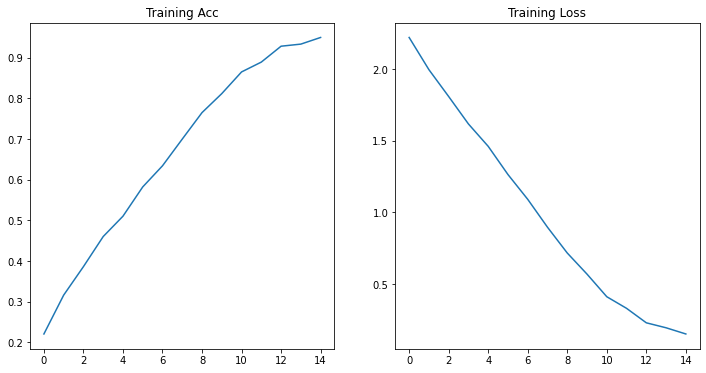

In [ ]:
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.title('Training Acc')

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.title('Training Loss')
plt.show()

18/18 [==============================] - 6s 322ms/step
there were 655 errors in 1100 tests for an accuracy of  40.45


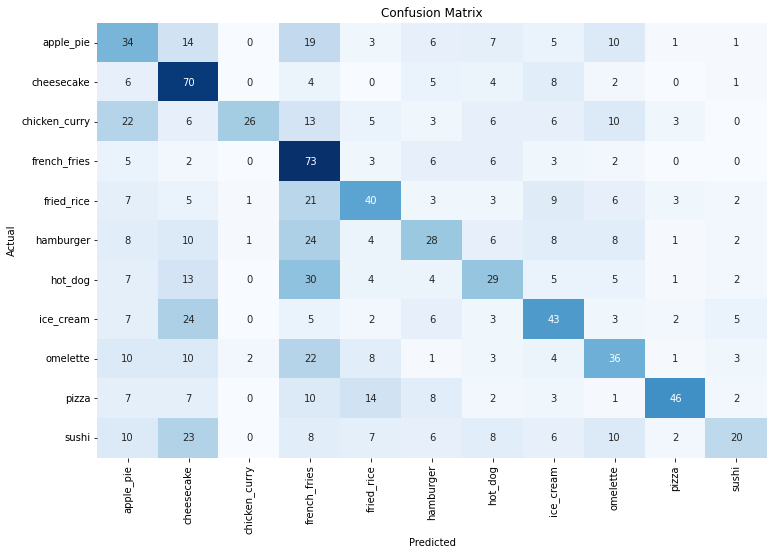

Classification Report:
----------------------
                precision    recall  f1-score   support

    apple_pie     0.2764    0.3400    0.3049       100
   cheesecake     0.3804    0.7000    0.4930       100
chicken_curry     0.8667    0.2600    0.4000       100
 french_fries     0.3188    0.7300    0.4438       100
   fried_rice     0.4444    0.4000    0.4211       100
    hamburger     0.3684    0.2800    0.3182       100
      hot_dog     0.3766    0.2900    0.3277       100
    ice_cream     0.4300    0.4300    0.4300       100
     omelette     0.3871    0.3600    0.3731       100
        pizza     0.7667    0.4600    0.5750       100
        sushi     0.5263    0.2000    0.2899       100

     accuracy                         0.4045      1100
    macro avg     0.4674    0.4045    0.3979      1100
 weighted avg     0.4674    0.4045    0.3979      1100



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
def predictor(test_gen):
    y_pred= []
    y_true=test_gen.labels
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=net.predict(test_gen, verbose=1)
    tests=len(preds)    
    for i, p in enumerate(preds):        
        pred_index=np.argmax(p)         
        true_index=test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors=errors + 1
            file=test_gen.filenames[i]            
        y_pred.append(pred_index)
            
    acc=( 1-errors/tests) * 100
    print(f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}')
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests
errors, tests=predictor(val_ds)

# Flower classifcation

https://www.kaggle.com/datasets/batoolabbas91/flower-photos-by-the-tensorflow-team/code

In [ ]:
! pip install kaggle
#! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# download dataset
! kaggle datasets download -d batoolabbas91/flower-photos-by-the-tensorflow-team

100% 219M/219M [00:03<00:00, 95.7MB/s]
100% 219M/219M [00:03<00:00, 63.2MB/s]


In [ ]:
! unzip /content/flower-photos-by-the-tensorflow-team.zip

Archive:  /content/flower-photos-by-the-tensorflow-team.zip
  inflating: flower_photos/LICENSE.txt  
  inflating: flower_photos/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flower_photos/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flower_photos/daisy/10172379554_b296050f82_n.jpg  
  inflating: flower_photos/daisy/10172567486_2748826a8b.jpg  
  inflating: flower_photos/daisy/10172636503_21bededa75_n.jpg  
  inflating: flower_photos/daisy/102841525_bd6628ae3c.jpg  
  inflating: flower_photos/daisy/1031799732_e7f4008c03.jpg  
  inflating: flower_photos/daisy/10391248763_1d16681106_n.jpg  
  inflating: flower_photos/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flower_photos/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flower_photos/daisy/10466290366_cc72e33532.jpg  
  inflating: flower_photos/daisy/10466558316_a7198b87e2.jpg  
  inflating: flower_photos/daisy/10555749515_13a12a026e.jpg  
  inflating: flower_phot

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import pathlib

input_dir = pathlib.Path('/content/flower_photos')
image_count = len(list(input_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
batch_size = 32
img_h = 180
img_w = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(input_dir,
                                                               validation_split=0.2,
                                                               subset='training',
                                                               seed=567,
                                                               image_size=(img_h,img_w),
                                                               batch_size=batch_size,
                                                              )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(input_dir,
                                                             validation_split=0.2,
                                                             subset='validation',
                                                             seed=567,
                                                             image_size=(img_h,img_w),
                                                             batch_size=batch_size,
                                                            )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


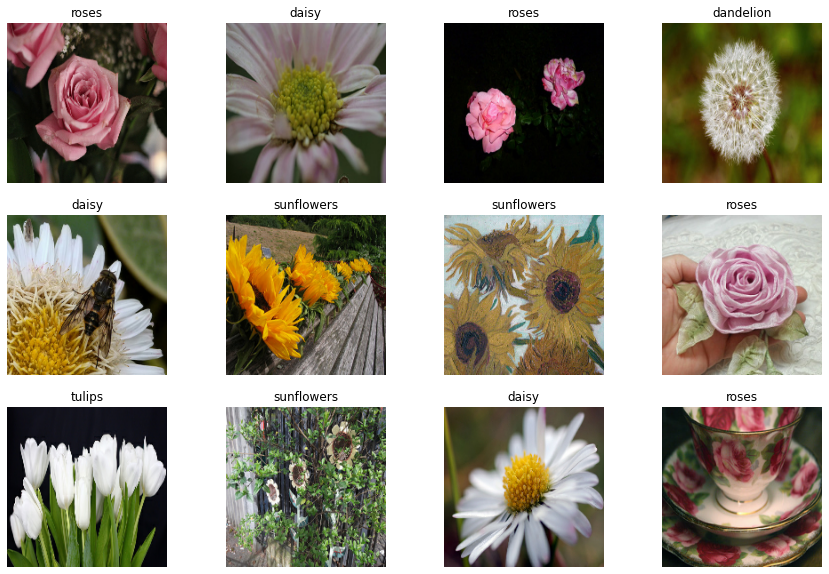

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

for images,labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
for img, label in train_ds.take(1):
  print(img.shape)
  print(label.shape)

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

X_train = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
X_val = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

n_classes = len(class_names)

augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_h,img_w,3)),
    augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(n_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=epochs)

Epoch 1/20
92/92 [==============================] - 13s 120ms/step - loss: 1.4007 - accuracy: 0.4019 - val_loss: 1.1773 - val_accuracy: 0.4905
Epoch 2/20
92/92 [==============================] - 9s 92ms/step - loss: 1.1319 - accuracy: 0.5198 - val_loss: 1.0893 - val_accuracy: 0.5899
Epoch 3/20
92/92 [==============================] - 10s 106ms/step - loss: 1.0315 - accuracy: 0.5817 - val_loss: 1.1415 - val_accuracy: 0.5381
Epoch 4/20
92/92 [==============================] - 10s 107ms/step - loss: 0.9409 - accuracy: 0.6192 - val_loss: 1.2721 - val_accuracy: 0.5450
Epoch 5/20
92/92 [==============================] - 10s 109ms/step - loss: 0.9152 - accuracy: 0.6410 - val_loss: 0.8766 - val_accuracy: 0.6267
Epoch 6/20
92/92 [==============================] - 9s 92ms/step - loss: 0.8769 - accuracy: 0.6543 - val_loss: 0.8703 - val_accuracy: 0.6676
Epoch 7/20
92/92 [==============================] - 9s 91ms/step - loss: 0.8404 - accuracy: 0.6706 - val_loss: 0.8396 - val_accuracy: 0.6580
Epoch

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/flowers_weights.h5')

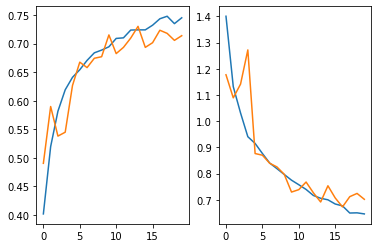

In [ ]:
stats = pd.DataFrame(history.history)
acc = stats['accuracy']
val_acc = stats['val_accuracy']
loss = stats['loss']
val_loss = stats['val_loss']
y = range(epochs)

plt.figure()
plt.subplot(1,2,1)
plt.plot(y,acc,label='Training Accuracy')
plt.plot(y,val_acc,label='Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(y,loss,label='Training loss')
plt.plot(y,val_loss,label='Validation Loss')